In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot

|i + (j-1)*Nx> < i + 1 + (j-1)*Nx| 

## Defining the initial values 

In [26]:
#Defining the position states 

x_limit = 10
y_limit = 10
x_ket = np.zeros(x_limit)
y_ket = np.zeros(y_limit)
x_ket[round(x_limit/2)] = 1
y_ket[round(y_limit/2)] = 1
y_ket.shape

(10,)

In [27]:
# Hammard Coin operators 
coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])

Y_coin = np.array([[1/np.sqrt(2), 1j/np.sqrt(2)],
                 [1j/np.sqrt(2), 1/np.sqrt(2)]])


In [28]:
# Defining the Spin States 

# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)

# Perform the outer product
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1,1)
down_matrix = down_t @ down.reshape(1,-1)


### Writing the shift operator 

In [29]:
#Sx 
n = x_limit * y_limit
S_right_x = np.zeros((n,n))
S_left_x = np.zeros((n,n))
# |i+1><i|
for i in range(0,x_limit-1):
    for j in  range(0,y_limit):
        S_right_x[i+j*x_limit][i+1+j*x_limit] = 1
# |i-1><i|
for i in range(1,x_limit):
    for j in range(0,y_limit):
        S_left_x [i+j*y_limit][i-1+j*y_limit] = 1
S1_x = np.kron(S_right_x,down_matrix)
S2_x = np.kron(S_left_x,up_matrix)
S_x = S1_x + S2_x



In [30]:
#Sy 
S_left_y = np.zeros((n,n))
S_right_y = np.zeros((n,n))
# |i+n><i|
for i in range (0,x_limit):
    for j in range(0,y_limit-2):
        S_right_y[i+y_limit*(j+1)][i+y_limit*(j+2)] = 1
# |i-n><i| 
for i in range(0,x_limit):
    for j in range(1,y_limit):
        S_left_y[i + y_limit*j][i+y_limit*(j-1)]=1
S_y = S_left_y + S_right_y
S1_y = np.kron(S_right_y,down_matrix)
S2_y = np.kron(S_left_y,up_matrix)
S_y = S1_y + S2_y

In [31]:
# #writing the shift matrices 
# n = x_limit * y_limit

# # Sx operator 
# S_right_x = np.zeros((n,n))
# S_left_x = np.zeros((n,n))
# for i in range(0,n-1):
#     S_right_x[i+1][i] = 1
# for i in range(1,n):
#     S_left_x[i-1][i] =1 
# S1_x = np.kron(up_matrix,S_right_x)
# S2_x = np.kron(down_matrix,S_left_x)
# S_x = S1_x + S2_x

# #Sy operator 
# S_right_y = np.zeros((n,n))
# S_left_y = np.zeros((n,n))
# # |n+i><i| |i-n><i| 
# for i in range(0,n-y_limit-1):
#     S_right_y[i+y_limit][i] = 1
# for i in range(y_limit,n):
#     S_left_y[i-y_limit][i]= 1
# S1_y = np.kron(up_matrix,S_right_y)
# S2_y = np.kron(down_matrix,S_left_y)
# S_y = S1_y + S1_y

# UP X ZERO

In [32]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,up)
zero_ket.shape
print(init_state)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


up X i => 2 * i index
down x i => 2 * i + 1 indecx

In [33]:
state = init_state
coin_adj = np.kron(np.eye(n,n),coin)

# state = coin_adj @ state
# state = S_x @ state 
# state = coin_adj @ state 
# state = S_y @ state
# for i in range(0,state.shape[0]):
#     if(state[i]!=0):
#         print(i)
# print(state)


for _ in range (n):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
print(state)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00092159
  0.          0.          0.          0.00274108  0.          0.
  0.         -0.00505598  0.          0.          0.          0.00731042
  0.          0.          0.         -0.00910916  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00760125  0.00793861  0.          0.
  0.0079977  -0.00942048  0.          0.         -0.0084459   0.01142046
  0.          0.          0.00885885 -0.01344897  0.          0.
 -0.00910916  0.01515989  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

In [34]:
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
#Convert to 2d grid 
print(pos_prob)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.49331364e-07]
 [0.00000000e+00]
 [7.51353064e-06]
 [0.00000000e+00]
 [2.55629247e-05]
 [0.00000000e+00]
 [5.34422813e-05]
 [0.00000000e+00]
 [8.29768000e-05]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.20800636e-04]
 [0.00000000e+00]
 [1.52708586e-04]
 [0.00000000e+00]
 [2.01760011e-04]
 [0.00000000e+00]
 [2.59353993e-04]
 [0.00000000e+00]
 [3.12799065e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.45851637e-04]
 [0.00000000e+00]
 [2.88720590e-04]
 [0.00000000e+00]
 [3.481713

In [35]:
grid2 = np.zeros((x_limit,y_limit))
for i in range(0,n):
    x = i % x_limit
    y = i // y_limit
    grid2[x][y] = pos_prob[i,0]
print(grid2)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.49331364e-07 0.00000000e+00 1.20800636e-04
  0.00000000e+00 2.45851637e-04 0.00000000e+00 1.47901714e-04
  0.00000000e+00 3.32140473e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.51353064e-06 0.00000000e+00 1.52708586e-04
  0.00000000e+00 2.88720590e-04 0.00000000e+00 1.84608777e-04
  0.00000000e+00 1.44646332e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.55629247e-05 0.00000000e+00 2.01760011e-04
  0.00000000e+00 3.48171365e-04 0.00000000e+00 2.33170463e-04
  0.00000000e+00 3.50240238e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

## Plots 

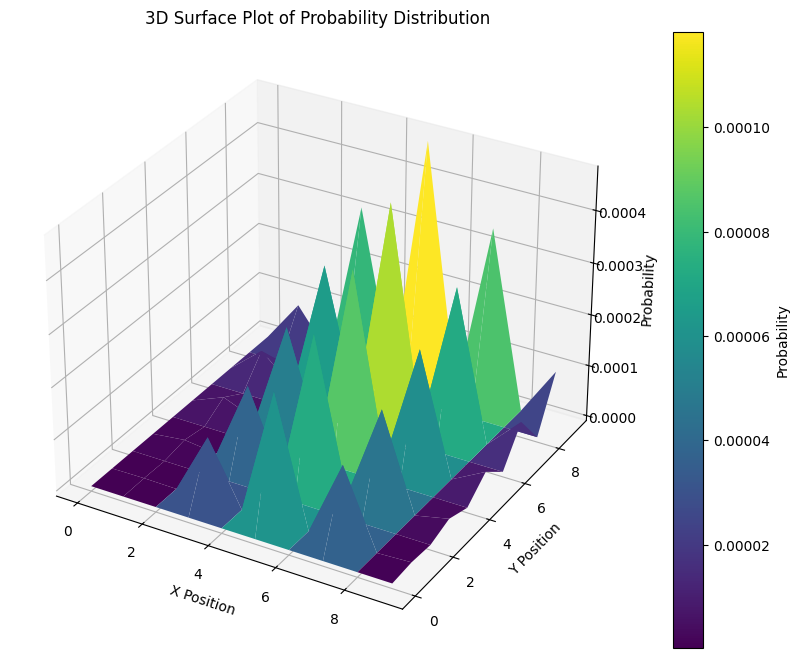

In [36]:
surface_plot(grid2)

# Down X | 12 >  initital state 

In [37]:
init_state2 = np.kron(zero_ket,down)
state = init_state2
for _ in range (n):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
print(state)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00182247
  0.          0.          0.         -0.00380324  0.          0.
  0.          0.00591811  0.          0.          0.         -0.00800632
  0.          0.          0.          0.00984441  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00787702 -0.00926575  0.          0.
 -0.00821401  0.01082307  0.          0.          0.00876361 -0.01250478
  0.          0.         -0.00934841  0.01417683  0.          0.
  0.00984441 -0.01559897  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

In [38]:
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
#Convert to 2d grid 
grid3 = np.zeros((x_limit,y_limit))
for i in range(0,n):
    x = i % x_limit
    y = i // y_limit
    grid3[x][y] = pos_prob[i,0]
print(grid3)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.32140473e-06 0.00000000e+00 1.47901714e-04
  0.00000000e+00 2.45851637e-04 0.00000000e+00 1.20800636e-04
  0.00000000e+00 8.49331364e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.44646332e-05 0.00000000e+00 1.84608777e-04
  0.00000000e+00 2.88720590e-04 0.00000000e+00 1.52708586e-04
  0.00000000e+00 7.51353064e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.50240238e-05 0.00000000e+00 2.33170463e-04
  0.00000000e+00 3.48171365e-04 0.00000000e+00 2.01760011e-04
  0.00000000e+00 2.55629247e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

## plots

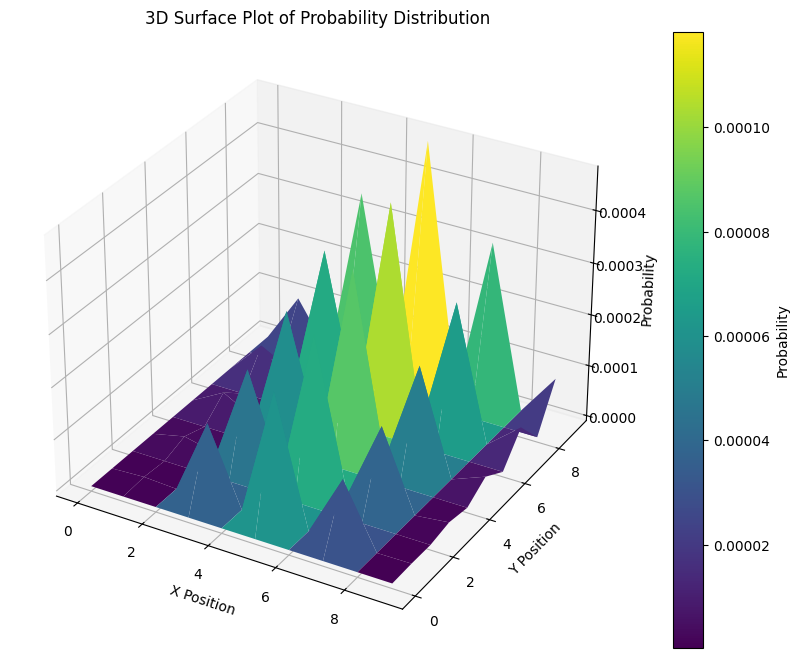

In [39]:
surface_plot(grid3)

# Superposition state 

In [40]:
up_coef = 1/np.sqrt(2)
down_coef = 1j/np.sqrt(2)

spin_superpos = up_coef*up + down_coef*down
init_state3 = np.kron(zero_ket,spin_superpos)
state = init_state3
for _ in range (n):
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
print(state)


[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j         -0.00065166+0.00128868j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.00193824-0.0026893j   0.        +0.j          0.        +0.j
  0.        +0.j         -0.00357512+0.00418474j  0.        +0.j
  0.        +0.j          0.        +0.j          0.00516925-0.00566132j
  0.        +0.j          0.        +0.j          0.        +0.j
 -0.00644115+0.00696105j  0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.     

In [41]:
grid = np.zeros((x_limit,y_limit))
for i in range(0,n):
    x = i % x_limit
    y = i // y_limit
    grid[x][y] = pos_prob[i,0]
print(grid)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.32140473e-06 0.00000000e+00 1.47901714e-04
  0.00000000e+00 2.45851637e-04 0.00000000e+00 1.20800636e-04
  0.00000000e+00 8.49331364e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.44646332e-05 0.00000000e+00 1.84608777e-04
  0.00000000e+00 2.88720590e-04 0.00000000e+00 1.52708586e-04
  0.00000000e+00 7.51353064e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.50240238e-05 0.00000000e+00 2.33170463e-04
  0.00000000e+00 3.48171365e-04 0.00000000e+00 2.01760011e-04
  0.00000000e+00 2.55629247e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [42]:
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state by multiplying with its complex conjugate
for i in range(state.shape[0]):
    state_prob[i] = state[i] * np.conjugate(state[i])

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i].real
    else:
        pos_prob[(i - 1) // 2] += state_prob[i].real
#Convert to 2d grid 
grid = np.zeros((x_limit,y_limit))
for i in range(0,n):
    x = i % x_limit
    y = i // y_limit
    grid[x][y] = pos_prob[i,0]
print(grid)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.08536805e-06 0.00000000e+00 1.34351175e-04
  0.00000000e+00 2.45851637e-04 0.00000000e+00 1.34351175e-04
  0.00000000e+00 2.08536805e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.09890819e-05 0.00000000e+00 1.68658682e-04
  0.00000000e+00 2.88720590e-04 0.00000000e+00 1.68658682e-04
  0.00000000e+00 1.09890819e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.02934742e-05 0.00000000e+00 2.17465237e-04
  0.00000000e+00 3.48171365e-04 0.00000000e+00 2.17465237e-04
  0.00000000e+00 3.02934742e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

## PLOTS

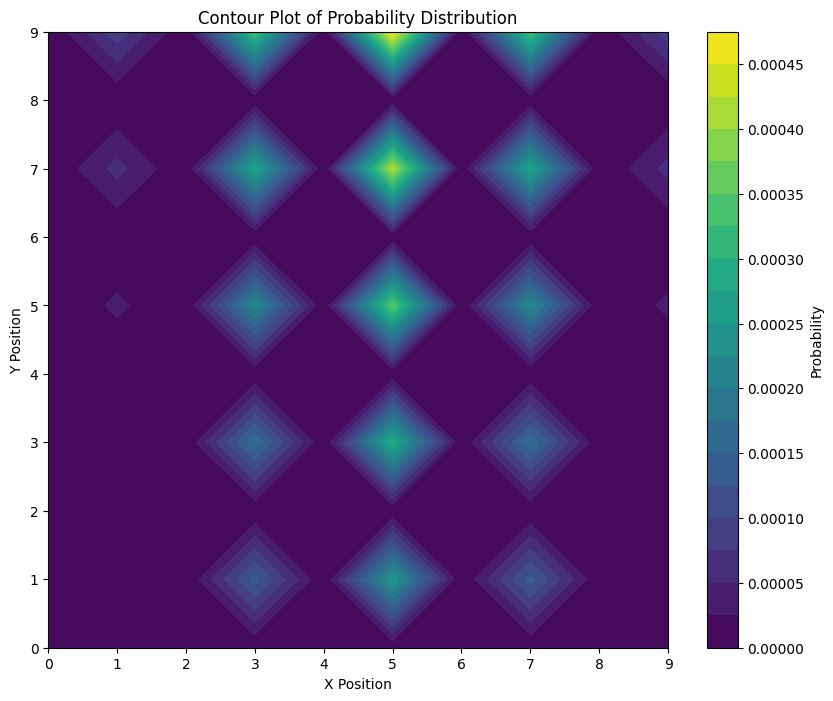

In [43]:
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot
contour_plot(grid)

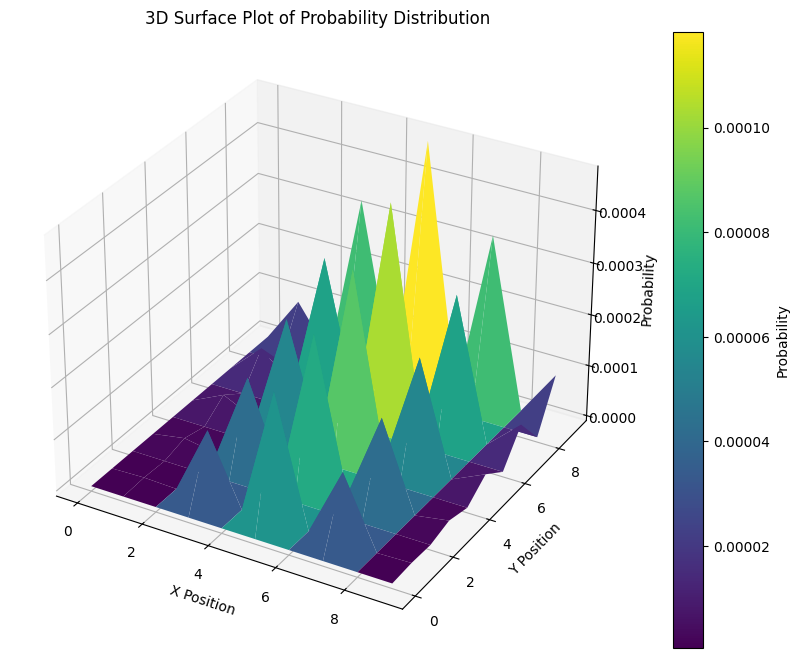

In [44]:
surface_plot(grid)

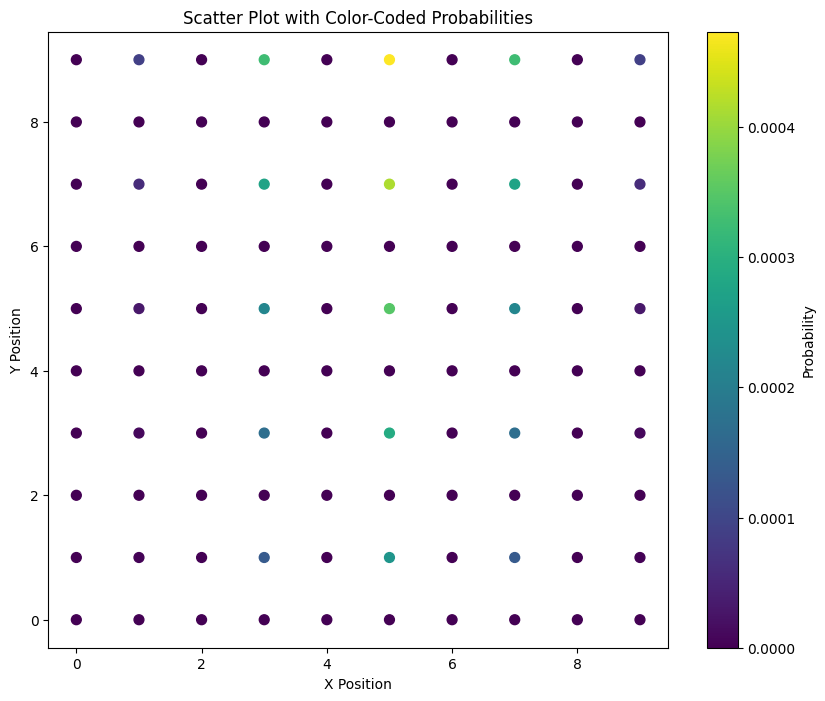

In [45]:
scatter_plot(grid)

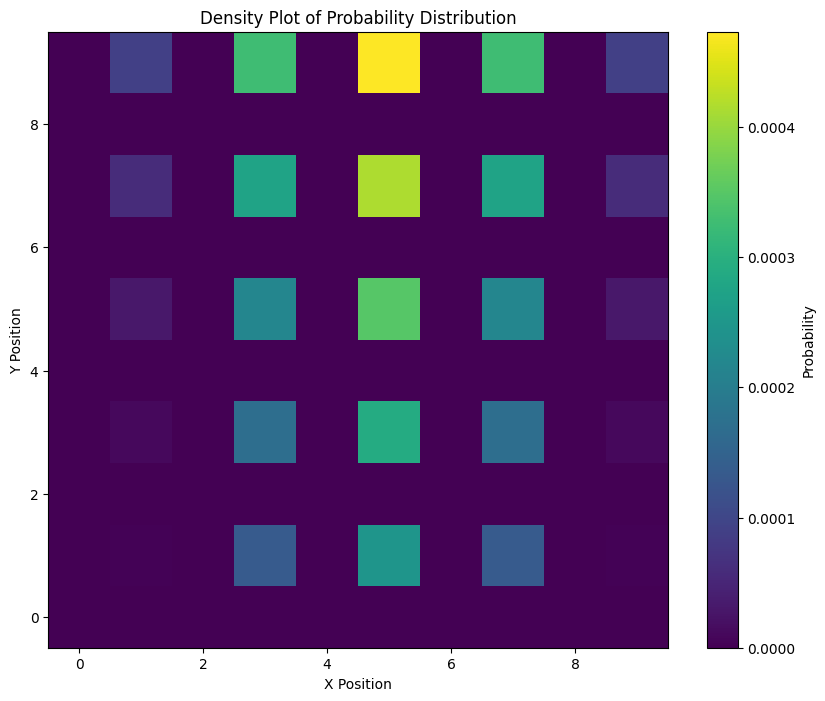

In [46]:
density_plot(grid)